# 利用Newton-Raphson算法实现逻辑回归
## 姓名：王宝琪 学号：22210980075

In [1]:
import numpy as np#导包
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['font.sans-serif']=['SimHei']#中文正常显示
plt.rcParams['axes.unicode_minus'] =False#负号正常显示

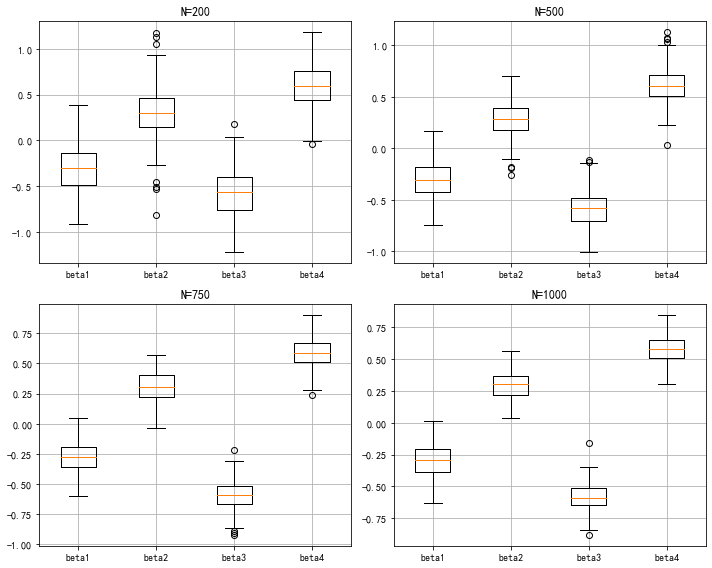

In [2]:
def sigmoid(z):#定义sigmoid函数
    return 1 / (1 + np.exp(-z))

def log_likelihood(y, x, b):#定义对数似然函数
    p = sigmoid(x @ b)
    return np.sum(y * np.log(p) + (1-y) * np.log(1-p))

def logistic_regression(x, y, r=200):#定义逻辑回归参数迭代函数
    n, p = x.shape
    beta_hat = np.zeros((p, 1))
    
    ll_old = log_likelihood(y, x, beta_hat)
    for i in range(r):
        p = sigmoid(x @ beta_hat)
        W = np.diagflat(p * (1 - p))
        z = x @ beta_hat + np.linalg.solve(W, y - p)
        beta_new = beta_hat + np.linalg.inv(x.T @ W @ x) @ x.T @ W @ z
        ll_new = log_likelihood(y, x, beta_new)
        
        if np.abs(ll_new - ll_old) < 1e-5:
            break
        
        beta_hat = beta_new
        ll_old = ll_new
    
    return beta_hat

np.random.seed(123)#设置随机数种子为123

N_list = [200, 500, 750, 1000]
R = 200
beta_true = np.array([[-0.5], [0.5], [-1], [1]])
boxplot_data = []

for N in N_list:
    x = np.hstack((np.ones((N, 1)), np.random.normal(size=(N, 3))))
    y = np.random.binomial(n=1, p=sigmoid(x @ beta_true))
    beta_diff = np.zeros((R, 4))
    
    for r in range(R):
        np.random.seed(r+1)
        x_r = np.hstack((np.ones((N, 1)), np.random.normal(size=(N, 3))))
        y_r = np.random.binomial(n=1, p=sigmoid(x_r @ beta_true))
        beta_hat = logistic_regression(x_r, y_r)
        beta_diff[r] = np.squeeze(beta_hat) - beta_true.reshape(4)
        
    boxplot_data.append(beta_diff)

fig, axs = plt.subplots(2, 2, figsize=(10, 8))#绘制箱线图
axs = axs.flatten()

for i, data in enumerate(boxplot_data):
    axs[i].boxplot(data)
    axs[i].grid(True)
    axs[i].set_xticklabels(['beta1', 'beta2', 'beta3', 'beta4'])
    axs[i].set_title('N={}'.format(N_list[i]))

plt.tight_layout()
plt.show()

根据题意，得到的样本量为200，500，750，1000时，四个维度beta的估计值与真实值的差的箱线图如上所示。可以看到，随着样本量增加，beta1,beta2,beta3,beta4的估计值均更接近于真实值。1000个样本比200个样本的估计水平有明显提高，参数的差的中位数与总体水平更接近于0。因此，提高样本量能够有效提高Newton-Raphson算法估计的准确性。